In [23]:
import torch
from  torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

## 1. Getting a Dataset

In [24]:
#Setup training data

train_data=datasets.FashionMNIST(
    root="data",  # where to download data
    train=True,   #get training data
    download=True, # do we download the data
    transform=ToTensor(), # how do you transform the data
    target_transform=None # how do you transform the labels
)

# setup testing data
test_data= datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
 )

In [25]:
len(train_data),len(test_data)

(60000, 10000)

In [26]:
# see the first training sample
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [27]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [28]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [29]:
# check the shape of our image
image.shape,label

(torch.Size([1, 28, 28]), 9)

### 1.1 Visualizing our Data

Image shape: torch.Size([1, 28, 28])
Label: 9


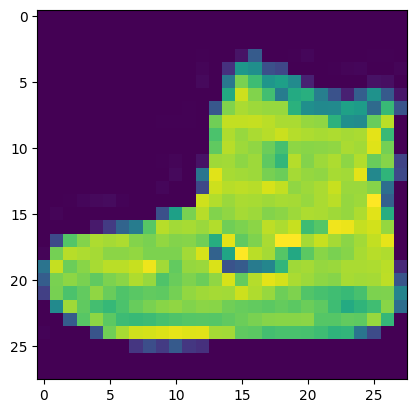

In [30]:
image,label=train_data[0]
print(f"Image shape: {image.shape}")
print(f"Label: {label}")
plt.imshow(image.squeeze())
plt.show()

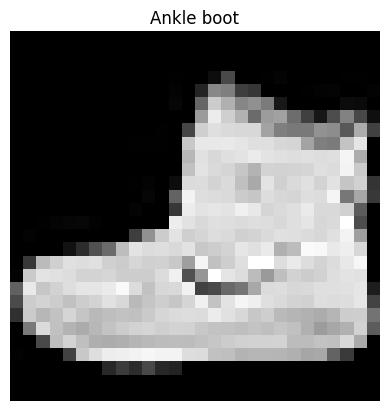

In [31]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis("off")
plt.show()

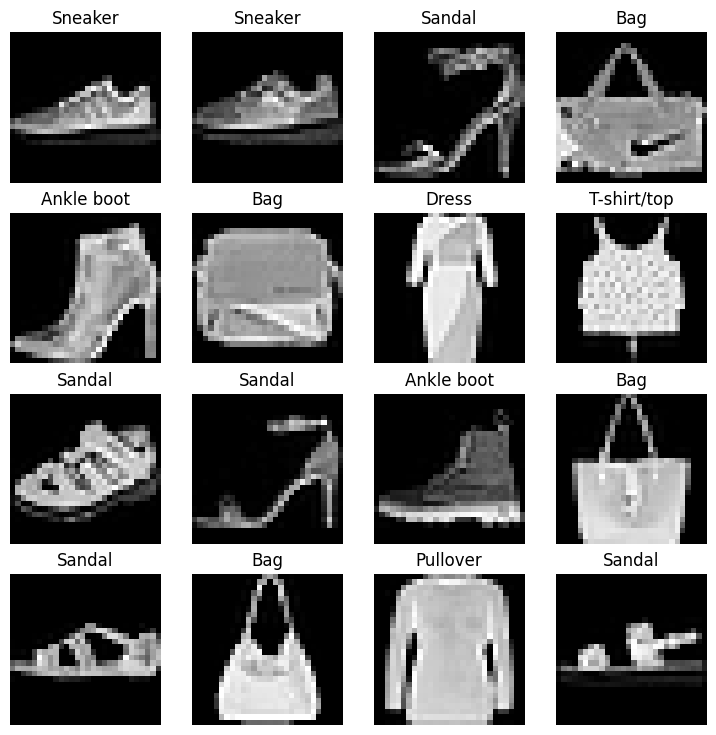

In [33]:
# plot more images
torch.manual_seed=(42)
fig=plt.figure(figsize=(9,9))
row,cols=4,4
for i in range (1,row*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  #print(random_idx)
  img,label=train_data[random_idx]
  fig.add_subplot(row,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis("off")
plt.show()

## 2. Prepare Dataloader

In [34]:
train_dataloader=DataLoader(train_data,batch_size=32,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=32,shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d16d2d89d90>,
 <torch.utils.data.dataloader.DataLoader at 0x7d16d2ec4ad0>)

In [35]:
len(train_dataloader),len(test_dataloader)

(1875, 313)

In [36]:
# check out what's inside the training dataloader

train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


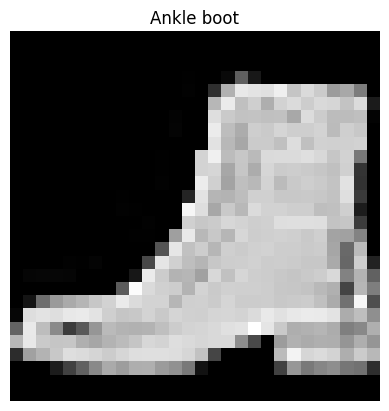

In [37]:
# Show a sample
torch.manual_seed=(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label: {label}, label size: {label.shape}")



## 3.Model 0: Build a baseline model

In [38]:
# create a flatten layer

flatten_model=nn.Flatten()

#Get a single sample
x=train_features_batch[0]
#Flatten the sample
output=flatten_model(x)
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [39]:
import torch.nn as nn

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)


In [40]:
torch.manual_seed=(42)
model_0 = FashionMNISTModelV0(
    input_shape=28 * 28,   # FashionMNIST images are 28x28 pixels
    hidden_units=10,       # Number of neurons in the hidden layer
    output_shape=len(class_names)  # 10 output classes
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [41]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[ 0.0327,  0.1186, -0.3324, -0.2701,  0.3914,  0.2123, -0.1490, -0.1428,
         -0.3775, -0.0617]], grad_fn=<AddmmBackward0>)

In [42]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0057, -0.0237,  0.0242,  ...,  0.0252,  0.0356, -0.0016],
                      [-0.0147, -0.0192, -0.0186,  ...,  0.0087,  0.0053, -0.0217],
                      [-0.0090,  0.0229, -0.0231,  ..., -0.0276, -0.0056, -0.0031],
                      ...,
                      [ 0.0310, -0.0159, -0.0014,  ...,  0.0331, -0.0042, -0.0058],
                      [ 0.0138,  0.0121, -0.0111,  ...,  0.0247,  0.0128, -0.0150],
                      [ 0.0228,  0.0131,  0.0081,  ..., -0.0023, -0.0197,  0.0290]])),
             ('layer_stack.1.bias',
              tensor([-0.0271, -0.0135, -0.0326, -0.0029,  0.0102,  0.0312, -0.0259, -0.0238,
                       0.0357,  0.0063])),
             ('layer_stack.2.weight',
              tensor([[-0.2143,  0.1364,  0.3046,  0.0116, -0.1450, -0.1691, -0.1137,  0.1612,
                       -0.2238,  0.2876],
                      [-0.1957,  0.0887,  0.3146, -0.1398, -0.2114, -0.1639, -0.

## 3.1 Setup loss,optimizer and evaluation metrics

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item() #torch.eq find where two tensors are same
  acc=(correct/len(y_pred))*100
  return acc

In [ ]:
# setup loss function and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

### 3.2 Creating a function to time the experiments

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

### 3.3Creating a training loop and training a model on batches of data

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed=(42)
train_time_start_on_cpu=timer()

epochs=10

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  ##Training......
  train_loss=0
  #add a loop to loop through the training batches
  for batch,(x,y) in enumerate(train_dataloader):
    model_0.train()

    #1. Forward pass
    y_pred=model_0(x)

    #2.Calculate the loss
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    
    #3.Optimizer zero grad
    optimizer.zero_grad()
    
    #4.loss backward
    loss.backward()
    
    #5.optimizer step
    optimizer.step()

    if batch%400==0:
      print(f"Looked at {batch*len(x)}/{len(train_dataloader.dataset)} samples")
  
  train_loss/=len(train_dataloader)
  #print(f"Train loss: {train_loss:.5f}")

  ### Testing Loop

  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for x,y in test_dataloader:
      ##1. Forward Pass
      test_pred=model_0(x)
      ##2. Calculate the loss
      test_loss+=loss_fn(test_pred,y)
      ##3. Calculate the accuracy
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
  print(f"\n Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f} , Test_acc:{test_acc:.4f}")

train_time_end_on_cpu=timer()
print(f"Total training time: {print_train_time(start=train_time_start_on_cpu,end=train_time_end_on_cpu,device=str(next(model_0.parameters()).device))}")








## 4.1  Make predictions and get Model 0 results

In [ ]:
torch.manual_seed=(42)
def eval_model(model,data_loader,loss_fn,accuracy_fn):
  """ Returns a dictionary containing the results of model predicting on data_loader"""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      # Make predictions
      y_pred=model(x)

      #Accumulate the loss and acc values per batch
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    #scale loss and acc to find the average loss/acc per batch
    loss/=len(data_loader)
    acc/=len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}

model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model_0_results


## Setup device agnostic code

In [ ]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

## 6. Model 1: Building a better model with non-linearity

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
# create an instance of model_1
torch.manual_seed=(42)
model_1=FashionMNISTModelV1(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
model_1

### 6.1 Steup loss ,optimizer and evaluation metrics

In [ ]:
#Setup loss function
loss_1=nn.CrossEntropyLoss()

#setup optimizer
optimizer_1=torch.optim.SGD(params=model_1.parameters(),lr=0.1)


### 6.2 Functionizing training and evaluation/testing loops

In [ ]:
def train_step(model
               ,data_loader,
               loss_fn,
               optimizer,
               accuracy_fn,
               device):
    """ Performs a training with model trying to learn on data_loader"""

    train_loss, train_acc=0,0
    model.train()
    #add a loop to loop through the training batches
    for batch,(x,y) in enumerate(train_dataloader):
      x,y=x.to(device),y.to(device)

      #1. Forward pass
      y_pred=model(x)

      #2.Calculate the loss
      loss=loss_fn(y_pred,y)
      train_loss+=loss
      train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1)) #go from logits -> prediction labels
      
      #3.Optimizer zero grad
      optimizer.zero_grad()
      
      #4.loss backward
      loss.backward()
      
      #5.optimizer step
      optimizer.step()
    
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    print(f"Train loss: {train_loss:.4f} | Train_acc: {train_acc:.4f}")


In [ ]:
def test_step(model,data_loader,loss_fn,accuracy_fn,device):
  """ Performs a testing with model trying to learn on data_loader"""
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:
      x,y=x.to(device),y.to(device)
      ##1. Forward Pass
      test_pred=model(x)
      ##2. Calculate the loss
      test_loss+=loss_fn(test_pred,y)
      ##3. Calculate the accuracy
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"\n Test loss: {test_loss:.4f} , Test_acc:{test_acc:.4f}")



In [ ]:
torch.manual_seed=(42)

train_time_start_on_gpu=timer()
epochs=10

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_1,
             optimizer=optimizer_1,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_1,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_on_gpu=timer()
print(f"Total training time: {print_train_time(start=train_time_start_on_gpu,end=train_time_end_on_gpu,device=str(next(model_1.parameters()).device))}")



In [ ]:
torch.manual_seed=(42)
def eval_model(model,data_loader,loss_fn,accuracy_fn):
  """ Returns a dictionary containing the results of model predicting on data_loader"""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      x,y=x.to(device),y.to(device)
      # Make predictions
      y_pred=model(x)

      #Accumulate the loss and acc values per batch
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    #scale loss and acc to find the average loss/acc per batch
    loss/=len(data_loader)
    acc/=len(data_loader)
  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}

model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model_1_results
